In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.utils import shuffle
from sklearn.model_selection import KFold
from sklearn import tree
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [3]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',header=None)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
X = data[[2,4,10,11,12]]
y = (data[14]==' >50K').astype(int)
X, y = shuffle(X, y, random_state=0)
print(X.shape)
X

(32561, 5)


,2,4,10,11,12
22278,177119,10,0,0,44
8950,216481,13,0,0,40
7838,256263,12,0,0,40
16505,147640,3,0,1902,40
19140,172822,7,0,2824,76
...,...,...,...,...,...
13123,33331,14,0,0,40
19648,98466,6,0,0,35
9845,45317,10,0,0,40
10799,215862,16,7688,0,45


In [5]:
print(y.shape)
y

(32561,)


22278    0
8950     0
7838     0
16505    0
19140    1
        ..
13123    1
19648    0
9845     0
10799    1
2732     0
Name: 14, Length: 32561, dtype: int64

In [ ]:
model=tree.DecisionTreeClassifier(criterion="entropy")
model.fit(X,y)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
model.score(X,y)

0.9936427013912349

[Text(0.7913856231242908, 0.9945652173913043, 'x[2] <= 7073.5\nentropy = 0.796\nsamples = 32561\nvalue = [24720, 7841]'),
 Text(0.5864311869023032, 0.9836956521739131, 'x[1] <= 12.5\nentropy = 0.736\nsamples = 31162\nvalue = [24700, 6462]'),
 Text(0.26151848879394635, 0.9728260869565217, 'x[4] <= 37.5\nentropy = 0.588\nsamples = 23924\nvalue = [20544, 3380]'),
 Text(0.05716892054260324, 0.9619565217391305, 'x[3] <= 1820.5\nentropy = 0.252\nsamples = 5960\nvalue = [5709, 251]'),
 Text(0.041209598674974944, 0.9510869565217391, 'x[4] <= 34.5\nentropy = 0.237\nsamples = 5907\nvalue = [5678, 229]'),
 Text(0.019163851698182653, 0.9402173913043478, 'x[1] <= 8.5\nentropy = 0.193\nsamples = 4648\nvalue = [4510, 138]'),
 Text(0.003348456342766583, 0.9293478260869565, 'x[4] <= 29.5\nentropy = 0.076\nsamples = 1187\nvalue = [1176, 11]'),
 Text(0.0020246480212077014, 0.9184782608695652, 'x[1] <= 6.5\nentropy = 0.04\nsamples = 929\nvalue = [925, 4]'),
 Text(0.0017131637102526704, 0.907608695652174, 

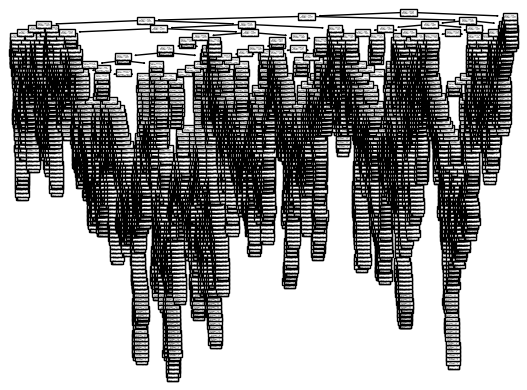

In [ ]:
tree.plot_tree(model)

In [9]:
#data[14][32560]
y.value_counts()

0    24720
1     7841
Name: 14, dtype: int64

In [10]:
1 - y[y==1].count()/y.shape[0]

0.7591904425539756

In [13]:
clf = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.1, max_depth=3, random_state=0,loss='exponential').fit(X,y)

In [12]:
(clf.predict(X)==y).sum()/y.shape[0]

0.8568840023340807

In [22]:
q = np.array([(p==y).sum()/y.shape[0] for p in clf.staged_predict(X)])

In [16]:
imp = clf.feature_importances_
imp

array([0.14435047, 0.21988921, 0.39004297, 0.13010331, 0.11561403])

In [23]:
model = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.1, max_depth=3, random_state=0, max_leaf_nodes=2).fit(X,y)
q_2 = np.array([(p==y).sum()/y.shape[0] for p in model.staged_predict(X)])

In [31]:
model = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.1, max_depth=3, random_state=0, max_leaf_nodes=5).fit(X,y)
q_5 = np.array([(p==y).sum()/y.shape[0] for p in model.staged_predict(X)])

In [32]:
model = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.1, max_depth=3, random_state=0, max_leaf_nodes=10).fit(X,y)
q_10 = np.array([(p==y).sum()/y.shape[0] for p in model.staged_predict(X)])

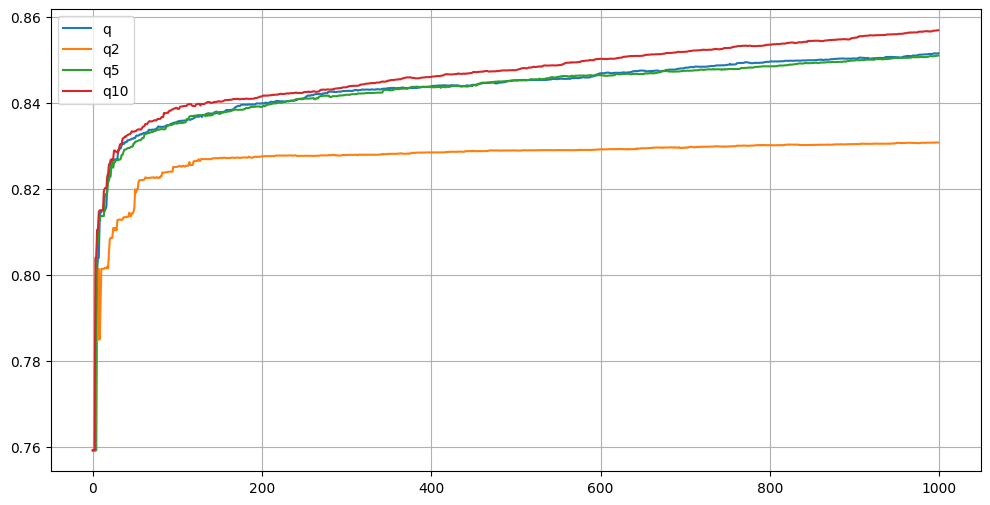

In [33]:
plt.figure(figsize=(12,6))
plt.plot(q, label = 'q')
plt.plot(q_2, label = 'q2')
plt.plot(q_5, label = 'q5')
plt.plot(q_10, label = 'q10')
plt.legend()
plt.grid()

In [8]:
def crossval(X,y,model,n_splits):
    kf = KFold(n_splits)
    q_cv = np.zeros(X.shape[0])
    scor = []
    for train, test in kf.split(X):
        X_train, X_test, y_train, y_test = X.iloc[train], X.iloc[test], y.iloc[train], y.iloc[test]
        clf = model.fit(X_train,y_train)
        q = np.array([(p==y_test).sum()/y_test.shape[0] for p in clf.staged_predict(X_test)])
        scor.append(q)
    return np.array(scor)

In [ ]:
model = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.1, max_depth=3, random_state=0)
q_cv = crossval(X,y,model,5)
q_cv

In [36]:
model = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.1, max_depth=3, random_state=0, max_leaf_nodes=2)
q_cv_2 = crossval(X,y,model,5)
q_cv_2

array([[0.75510517, 0.75510517, 0.75510517, ..., 0.82634731, 0.82650084,
        0.82634731],
       [0.76090295, 0.76090295, 0.76090295, ..., 0.83230958, 0.83230958,
        0.83230958],
       [0.75383907, 0.75383907, 0.75383907, ..., 0.82493857, 0.82493857,
        0.82493857],
       [0.75967445, 0.75967445, 0.75967445, ..., 0.83384521, 0.83399877,
        0.83384521],
       [0.7664312 , 0.7664312 , 0.7664312 , ..., 0.83277027, 0.83277027,
        0.83292383]])

In [37]:
model = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.1, max_depth=3, random_state=0, max_leaf_nodes=5)
q_cv_5 = crossval(X,y,model,5)
q_cv_5

array([[0.75510517, 0.75510517, 0.75510517, ..., 0.83525257, 0.83509903,
        0.83509903],
       [0.76090295, 0.76090295, 0.76090295, ..., 0.83891278, 0.83891278,
        0.83891278],
       [0.75383907, 0.75383907, 0.75383907, ..., 0.83338452, 0.83338452,
        0.83338452],
       [0.75967445, 0.75967445, 0.75967445, ..., 0.83937346, 0.83937346,
        0.83937346],
       [0.7664312 , 0.7664312 , 0.7664312 , ..., 0.83783784, 0.83783784,
        0.83783784]])

In [38]:
model = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.1, max_depth=3, random_state=0, max_leaf_nodes=10)
q_cv_10 = crossval(X,y,model,5)
q_cv_10

array([[0.75510517, 0.75510517, 0.75510517, ..., 0.83555965, 0.83555965,
        0.83555965],
       [0.76090295, 0.76090295, 0.76090295, ..., 0.8392199 , 0.8392199 ,
        0.8392199 ],
       [0.75383907, 0.75383907, 0.75383907, ..., 0.83353808, 0.83353808,
        0.83353808],
       [0.75967445, 0.75967445, 0.75967445, ..., 0.83829853, 0.83829853,
        0.83829853],
       [0.7664312 , 0.7664312 , 0.7664312 , ..., 0.83768428, 0.83783784,
        0.83783784]])

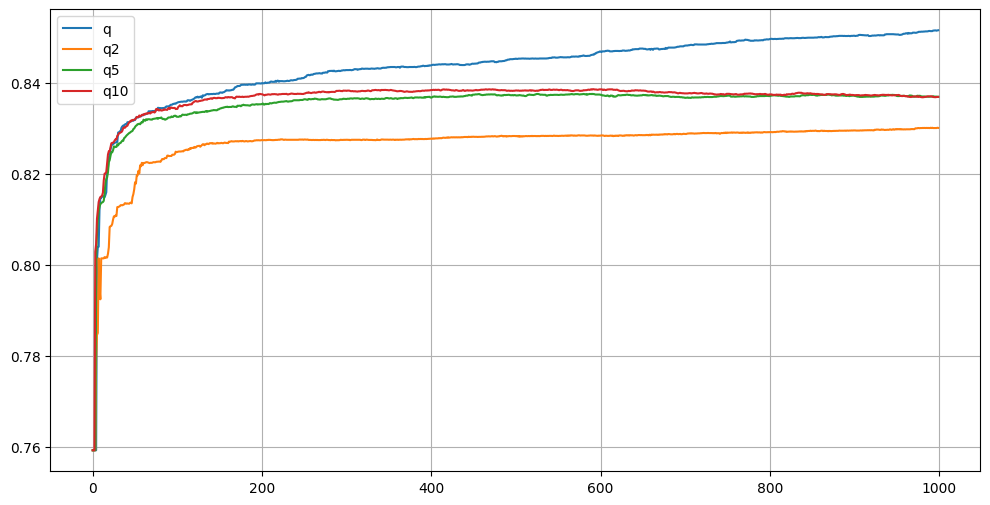

In [39]:
plt.figure(figsize=(12,6))
plt.plot(q_cv, label = 'q')
plt.plot(q_cv_2.mean(axis=0), label = 'q2')
plt.plot(q_cv_5.mean(axis=0), label = 'q5')
plt.plot(q_cv_10.mean(axis=0), label = 'q10')
plt.legend()
plt.grid()

In [40]:
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0).fit(X,y)
q_100 = np.array([(p==y).sum()/y.shape[0] for p in model.staged_predict(X)])

In [41]:
model = GradientBoostingClassifier(n_estimators=250, learning_rate=0.1, max_depth=3, random_state=0).fit(X,y)
q_250 = np.array([(p==y).sum()/y.shape[0] for p in model.staged_predict(X)])

In [42]:
model = GradientBoostingClassifier(n_estimators=500, learning_rate=0.1, max_depth=3, random_state=0).fit(X,y)
q_500 = np.array([(p==y).sum()/y.shape[0] for p in model.staged_predict(X)])

In [43]:
model = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.1, max_depth=3, random_state=0).fit(X,y)
q_1000 = np.array([(p==y).sum()/y.shape[0] for p in model.staged_predict(X)])

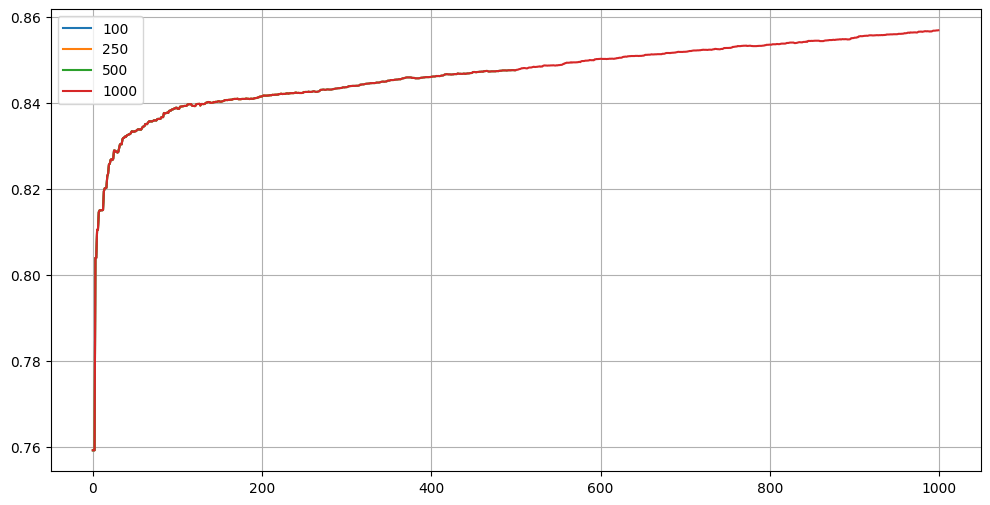

In [44]:
plt.figure(figsize=(12,6))
plt.plot(q_100, label = '100')
plt.plot(q_250, label = '250')
plt.plot(q_500, label = '500')
plt.plot(q_1000, label = '1000')
plt.legend()
plt.grid()

In [45]:
model = GradientBoostingClassifier(n_estimators=250, learning_rate=0.1, max_depth=6, random_state=0)
q_cv250 = crossval(X,y,model,5)
q_cv250

array([[0.75510517, 0.75510517, 0.75510517, ..., 0.83141409, 0.83141409,
        0.83126056],
       [0.76090295, 0.76090295, 0.76090295, ..., 0.83783784, 0.83783784,
        0.83768428],
       [0.75383907, 0.75383907, 0.75383907, ..., 0.83476658, 0.83476658,
        0.83476658],
       [0.75967445, 0.75967445, 0.75967445, ..., 0.83860565, 0.83875921,
        0.83860565],
       [0.7664312 , 0.7664312 , 0.7664312 , ..., 0.83906634, 0.83906634,
        0.83891278]])

In [46]:
model = GradientBoostingClassifier(n_estimators=500, learning_rate=0.1, max_depth=2, random_state=0)
q_cv500 = crossval(X,y,model,5)
q_cv500

array([[0.75510517, 0.75510517, 0.75510517, ..., 0.83617381, 0.83632735,
        0.83632735],
       [0.76090295, 0.76090295, 0.76090295, ..., 0.83952703, 0.83952703,
        0.83952703],
       [0.75383907, 0.75383907, 0.75383907, ..., 0.83246314, 0.83246314,
        0.83246314],
       [0.75967445, 0.75967445, 0.75967445, ..., 0.83814496, 0.83814496,
        0.83814496],
       [0.7664312 , 0.7664312 , 0.7664312 , ..., 0.83660934, 0.83660934,
        0.83660934]])

In [47]:
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=2, random_state=0)
q_cv100 = crossval(X,y,model,5)
q_cv100

array([[0.75510517, 0.75510517, 0.75510517, 0.79533241, 0.79533241,
        0.79533241, 0.79533241, 0.79748196, 0.80055274, 0.80208813,
        0.80208813, 0.80500537, 0.80193459, 0.80485183, 0.8066943 ,
        0.8066943 , 0.8066943 , 0.80623369, 0.80761554, 0.80761554,
        0.8145248 , 0.81437126, 0.81437126, 0.81621373, 0.81621373,
        0.8165208 , 0.81759558, 0.81759558, 0.81759558, 0.81759558,
        0.81943805, 0.81943805, 0.81959159, 0.81913097, 0.81928451,
        0.81928451, 0.81974513, 0.81959159, 0.81974513, 0.81974513,
        0.82020574, 0.82020574, 0.82220175, 0.82204821, 0.82189467,
        0.82204821, 0.82204821, 0.82220175, 0.82204821, 0.82204821,
        0.82204821, 0.82296945, 0.82281591, 0.82281591, 0.82266237,
        0.82296945, 0.82343006, 0.8235836 , 0.82389068, 0.82373714,
        0.82343006, 0.82343006, 0.8235836 , 0.8235836 , 0.82404422,
        0.82404422, 0.8243513 , 0.82481191, 0.82450484, 0.82450484,
        0.8243513 , 0.82481191, 0.82511899, 0.82

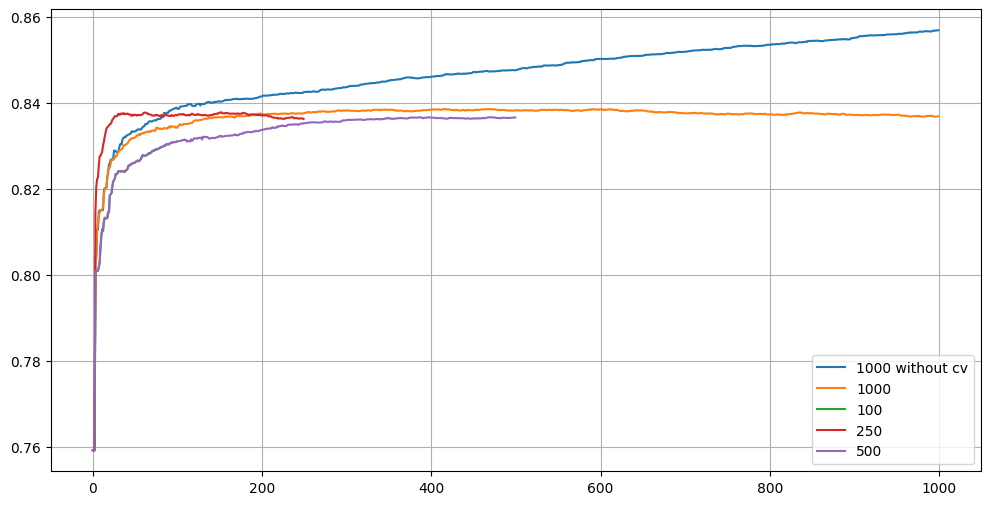

In [49]:
plt.figure(figsize=(12,6))
plt.plot(q_1000, label = '1000 without cv')
plt.plot(q_cv.mean(axis=0), label = '1000')
plt.plot(q_cv100.mean(axis=0), label = '100')
plt.plot(q_cv250.mean(axis=0), label = '250')
plt.plot(q_cv500.mean(axis=0), label = '500')
plt.legend()
plt.grid()

In [10]:
def crossval_rf(X,y,model,n_splits):
    kf = KFold(n_splits)
    q_cv = np.zeros(X.shape[0])
    scor = []
    for train, test in kf.split(X):
        X_train, X_test, y_train, y_test = X.iloc[train], X.iloc[test], y.iloc[train], y.iloc[test]
        clf = model.fit(X_train,y_train)
        q = (clf.predict(X)==y).sum()/y.shape[0]
        scor.append(q)
    return np.array(scor)

In [19]:
model = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
q_cv100 = crossval_rf(X,y,model,5)
q_cv100.mean(axis=0)

0.8091090568471484

In [20]:
model = RandomForestClassifier(n_estimators=250, max_depth=2, random_state=0)
q_cv250 = crossval_rf(X,y,model,5)
q_cv250.mean(axis=0)

0.8099075581216792

In [21]:
model = RandomForestClassifier(n_estimators=500, max_depth=2, random_state=0)
q_cv500 = crossval_rf(X,y,model,5)
q_cv500.mean(axis=0)

0.8093670341819967

In [22]:
model = RandomForestClassifier(n_estimators=1000, max_depth=2, random_state=0)
q_cv1000 = crossval_rf(X,y,model,5)
q_cv1000.mean(axis=0)

0.8093547495470041

In [23]:
 model = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
 clf = model.fit(X,y)
 q100 = (clf.predict(X)==y).sum()/y.shape[0]
 q100

0.8091581953871195

In [24]:
 model = RandomForestClassifier(n_estimators=1000, max_depth=2, random_state=0)
 clf = model.fit(X,y)
 q1000 = (clf.predict(X)==y).sum()/y.shape[0]
 q1000

0.8093731764994933

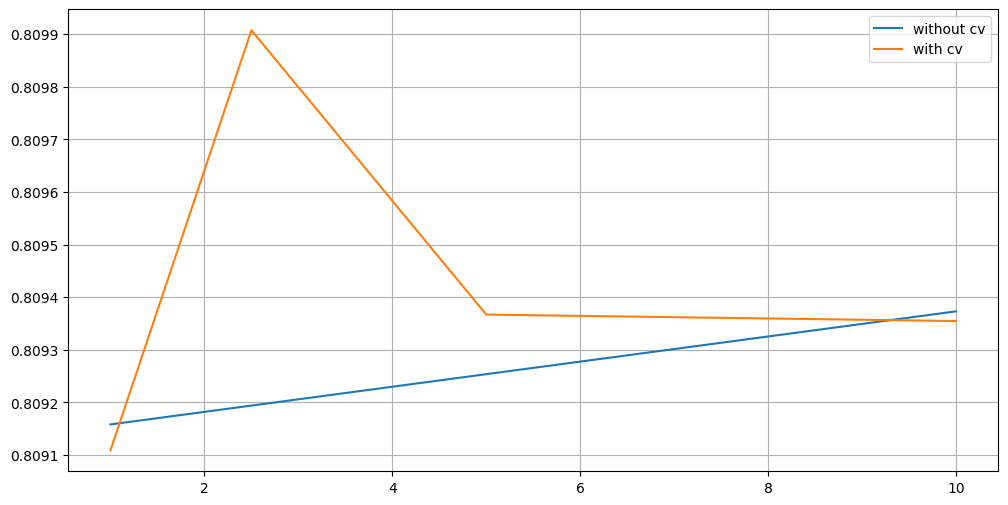

In [26]:
plt.figure(figsize=(12,6))
x1 = [q100, q1000]
y1 = [1, 10]

x2 = [q_cv100.mean(axis=0), q_cv250.mean(axis=0), q_cv500.mean(axis=0), q_cv1000.mean(axis=0)]
y2 = [1,2.5,5,10]

plt.plot(y1,x1, label = 'without cv')
plt.plot(y2,x2, label = 'with cv')
plt.legend()
plt.grid()